In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
base_twitter = pd.read_csv('twitter.csv')
base_twitter

,id,game,sentiment,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [6]:
base_twitter.isnull().sum()

id           0
game         0
sentiment    0
tweet        0
dtype: int64

In [5]:
base_twitter = base_twitter.dropna()

In [7]:
np.unique(base_twitter['sentiment'], return_counts=True)

(array(['Irrelevant', 'Negative', 'Neutral', 'Positive'], dtype=object),
 array([12875, 22358, 18108, 20655]))

<Axes: xlabel='sentiment', ylabel='count'>

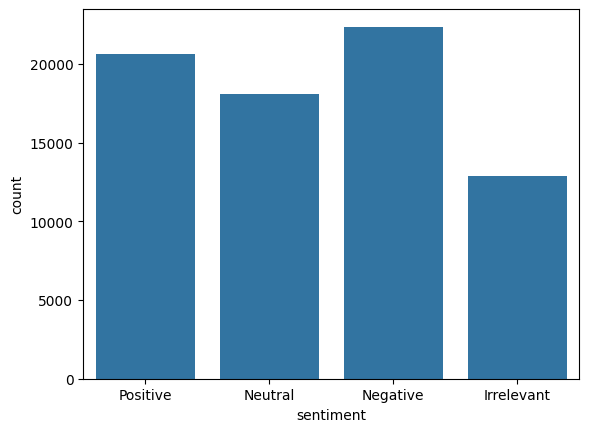

In [8]:
sns.countplot(x = base_twitter['sentiment'])

In [10]:
grafico = px.treemap(base_twitter, path=['sentiment', 'game'])
grafico.show()

#Label Encoder

In [16]:
base_twitter.columns

Index(['id', 'game', 'sentiment', 'tweet'], dtype='object')

In [17]:
x_twitter = base_twitter.iloc[:, [1,3]].values
y_twitter = base_twitter.iloc[:, 2].values

In [22]:
from sklearn.preprocessing import LabelEncoder
label_encoder_game = LabelEncoder()
label_encoder_tweet = LabelEncoder()

In [24]:
x_twitter[:, 0] = label_encoder_game.fit_transform(x_twitter[:, 0])
x_twitter[:, 1] = label_encoder_tweet.fit_transform(x_twitter[:, 1])

In [32]:
x_twitter

array([[4, 64619],
       [4, 27233],
       [4, 64618],
       ...,
       [21, 36810],
       [21, 36803],
       [21, 36735]], shape=(73996, 2), dtype=object)

In [35]:
np.unique(y_twitter) #['Irrelevant', 'Negative', 'Neutral', 'Positive']

array([0, 1, 2, 3])

In [38]:
from sklearn.model_selection import train_test_split

x_twitter_train, x_twitter_test, y_twitter_train, y_twitter_test = train_test_split(x_twitter, y_twitter, test_size= 0.2, random_state= 0)

x_twitter_train.shape, x_twitter_test.shape

((59196, 2), (14800, 2))

In [39]:
import pickle
with open('twitter.pkl', mode= 'wb') as f:
    pickle.dump([x_twitter_train, y_twitter_train, x_twitter_test, y_twitter_test], f)

#Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB
import pickle
with open('twitter.pkl', 'rb') as f:
    x_twitter_train, y_twitter_train, x_twitter_test, y_twitter_test = pickle.load(f)

naive_twitter = GaussianNB()
naive_twitter.fit(x_twitter_train, y_twitter_train)
previsoes = naive_twitter.predict(x_twitter_test)
previsoes

array([1, 1, 3, ..., 3, 1, 1], shape=(14800,))

In [43]:
y_twitter_test

array([1, 1, 2, ..., 1, 0, 1], shape=(14800,))

In [44]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_twitter_test, previsoes)

0.3339189189189189

0.3339189189189189

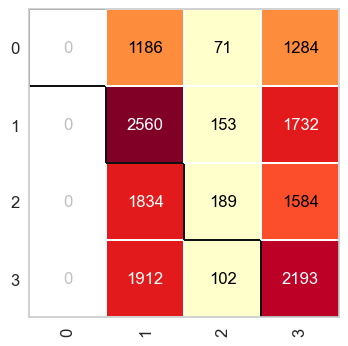

In [45]:
from yellowbrick.classifier import ConfusionMatrix
plt.figure(figsize=(4,4))
cm = ConfusionMatrix(naive_twitter)
cm.fit(x_twitter_train, y_twitter_train)
cm.score(x_twitter_test, y_twitter_test)

In [46]:
print(classification_report(y_twitter_test, previsoes))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2541
           1       0.34      0.58      0.43      4445
           2       0.37      0.05      0.09      3607
           3       0.32      0.52      0.40      4207

    accuracy                           0.33     14800
   macro avg       0.26      0.29      0.23     14800
weighted avg       0.28      0.33      0.26     14800



c:\Users\MIT1CT\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\MIT1CT\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\MIT1CT\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

